In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
sns.set_style('darkgrid')

In [3]:
df= pd.read_csv('players_20.csv')

In [4]:
pd.set_option("display.max_columns", None)
df.sample(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
8880,239438,https://sofifa.com/player/239438/teenage-hadeb...,T. Hadebe,Teenage Hadebe,23,1995-09-17,180,84,Zimbabwe,Yeni Malatyaspor,66,76,950000,4000,"CB, LB",Left,1,3,2,Medium/Medium,Lean,No,2100000.0,NaN,RCB,16.0,NaN,2019-07-14,2022.0,NaN,NaN,71.0,29.0,36.0,38.0,68.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,Power Free-Kick,33,25,70,38,32,35,36,31,35,33,73,70,49,56,67,41,76,63,77,24,66,58,30,36,39,50,69,72,70,15,9,5,14,6,43+2,43+2,43+2,39+2,39+2,39+2,39+2,39+2,38+2,38+2,38+2,41+2,40+2,40+2,40+2,41+2,54+2,54+2,54+2,54+2,54+2,59+2,65+2,65+2,65+2,59+2
16152,243893,https://sofifa.com/player/243893/kenan-fatkic/...,K. Fatkić,Kenan Fatkić,21,1997-08-20,186,75,Slovenia,FC Thun,58,67,200000,2000,CM,Left,1,3,2,High/Medium,Normal,No,330000.0,NaN,SUB,6.0,NaN,2018-06-04,2022.0,NaN,NaN,62.0,44.0,61.0,57.0,45.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,43,44,68,40,54,53,48,62,62,61,63,62,46,60,52,52,54,64,39,43,42,45,65,47,53,50,42,45,7,8,7,8,7,51+2,51+2,51+2,54+2,54+2,54+2,54+2,54+2,57+2,57+2,57+2,56+2,56+2,56+2,56+2,56+2,52+2,53+2,53+2,53+2,52+2,50+2,48+2,48+2,48+2,50+2
2736,210021,https://sofifa.com/player/210021/hany-mukhtar/...,H. Mukhtar,Hany Mukhtar,24,1995-03-21,173,71,Germany,Brøndby IF,73,79,5500000,15000,"CAM, CM",Right,1,5,3,High/Medium,Normal,No,8000000.0,NaN,SUB,10.0,NaN,2015-01-15,2021.0,NaN,NaN,79.0,63.0,70.0,78.0,44.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Selfish, Finesse Shot, Crowd Favourite",68,60,40,74,55,76,60,67,64,78,76,81,87,70,85,70,72,85,53,63,38,45,66,72,60,66,47,42,44,15,10,9,9,12,65+2,65+2,65+2,72+2,70+2,70+2,70+2,72+2,72+2,72+2,72+2,72+2,69+2,69+2,69+2,72+2,63+2,59+2,59+2,59+2,63+2,60+2,50+2,50+2,50+2,60+2
16825,246858,https://sofifa.com/player/246858/nicholas-mick...,N. Mickelson,Nicholas Mickelson,19,1999-07-24,185,80,Norway,Strømsgodset IF,56,70,180000,1000,RB,Right,1,3,2,High/Medium,Normal,No,338000.0,NaN,RES,14.0,NaN,2019-01-08,2021.0,NaN,NaN,70.0,28.0,40.0,54.0,51.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,28,51,40,29,54,35,29,36,56,68,72,52,47,55,29,61,68,67,22,53,53,45,37,33,40,43,57,55,10,9,11,8,11,44+2,44+2,44+2,48+2,46+2,46+2,46+2,48+2,45+2,45+2,45+2,50+2,45+2,45+2,45+2,50+2,54+2,49+2,49+2,49+2,54+2,54+2,53+2,53+2,53+2,54+2
17538,240432,https://sofifa.com/player/240432/peter-burke/2...,P. Burke,Peter Burke,23,1996-03-03,181,88,Republic of Ireland,Finn Harps,54,63,80000,1000,GK,Right,1,2,1,Medium/Medium,Stocky,No,140000.0,NaN,SUB,32.0,NaN,2017-07-31,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,53.0,51.0,56.0,38.0,54.0,NaN,11,7,8,20,4,11,14,12,20,13,47,30,27,43,58,38,58,19,65,6,22,11,5,27,9,27,19,10,13,55,53,51,54,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3572,235210,https://sofifa.com/player/235210/pedro-filipe-...,Pedrinho,Pedr

In [136]:
import requests
from bs4 import BeautifulSoup
from PIL import Image
from IPython.display import display


def get_player_image(url):
    #url = df.loc[0, 'player_url']

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

    response = requests.get(url, headers=headers).text

    soup = BeautifulSoup(response, 'html.parser')

    player_div = soup.find('div', {'class': 'bp3-card player'})
    img_tag = player_div.find('img')
    img_url = img_tag['data-srcset'].split('2x')[0].strip()

    image_response = requests.get(img_url, stream=True)

    img = Image.open(image_response.raw)
    display(img)

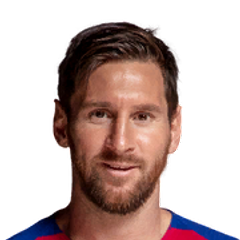

In [137]:
get_player_image(df.loc[0, 'player_url'])

In [5]:
df.shape

(18278, 104)

In [6]:
# filtering out early on columns which would be irrelevant for this project
irrelvant_cols=['sofifa_id', 'player_url', 'long_name', 'dob', 'real_face', 'body_type', 'player_tags','loaned_from', 'joined',
                'team_jersey_number', 'nation_jersey_number', 'contract_valid_until', 'player_traits']

In [7]:
fifa= df.drop(irrelvant_cols, axis=1)

In [8]:
fifa.shape

(18278, 91)

### Checking duplicates

In [9]:
fifa.duplicated().sum()

0

There are no duplicated records in the dataset

### Columns as per datatypes

In [10]:
integer_columns = fifa.select_dtypes(include=['int64']).columns
float_columns = fifa.select_dtypes(include=['float64']).columns
object_columns = fifa.select_dtypes(include=['object']).columns

In [11]:
print(' int64 columns:\n',integer_columns)
print('=========================================================================================================')
print(' float64 columns:\n',float_columns)
print('=========================================================================================================')
print(' object columns:\n',object_columns)

 int64 columns:
 Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning'

## Dealing with Missing Values

In [12]:
gk_attribute_cols= ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning']

In [13]:
fifa[gk_attribute_cols]=fifa[gk_attribute_cols].fillna(0)

In [14]:
fifa.sample(10)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,nation_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
11766,J. Biada,26,178,76,Germany,SV Sandhausen,64,65,550000,2000,"ST, CAM",Right,1,3,3,Medium/Medium,921000.0,SUB,NaN,70.0,66.0,59.0,66.0,35.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,48,63,50,64,66,64,62,66,50,65,72,69,73,62,74,69,54,68,60,70,48,36,63,63,61,62,31,34,35,7,15,12,9,9,63+2,63+2,63+2,63+2,64+2,64+2,64+2,63+2,64+2,64+2,64+2,62+2,59+2,59+2,59+2,62+2,51+2,49+2,49+2,49+2,51+2,49+2,44+2,44+2,44+2,49+2
9990,Park Han Bin,21,183,80,Korea Republic,Daegu FC,65,77,950000,2000,"CM, CDM",Right,1,3,2,Low/Medium,1400000.0,SUB,NaN,41.0,47.0,62.0,59.0,58.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,55,34,49,68,30,57,37,33,65,59,52,32,65,67,59,62,51,74,74,61,62,63,64,69,43,55,59,58,54,14,10,13,14,13,54+2,54+2,54+2,56+2,57+2,57+2,57+2,56+2,60+2,60+2,60+2,58+2,64+2,64+2,64+2,58+2,59+2,63+2,63+2,63+2,59+2,58+2,59+2,59+2,59+2,58+2
1114,M. van Ginkel,26,186,82,Netherlands,Chelsea,77,78,10500000,87000,CM,Right,2,4,3,High/High,20700000.0,RES,NaN,64.0,77.0,77.0,75.0,70.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,71,76,74,82,74,75,66,69,79,80,62,65,69,74,59,79,74,66,71,76,69,62,77,76,84,83,71,73,68,7,11,13,13,14,75+2,75+2,75+2,74+2,75+2,75+2,75+2,74+2,76+2,76+2,76+2,74+2,76+2,76+2,76+2,74+2,70+2,73+2,73+2,73+2,70+2,70+2,71+2,71+2,71+2,70+2
8840,M. Bakker,19,184,72,Netherlands,Paris Saint-Germain,66,77,975000,8000,LB,Left,1,3,3,Medium/Medium,2000000.0,RES,NaN,78.0,39.0,58.0,65.0,64.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,60,36,63,64,38,64,42,40,66,65,76,79,74,63,64,44,73,64,66,34,60,62,50,48,48,60,63,66,61,14,7,11,8,9,54+2,54+2,54+2,59+2,57+2,57+2,57+2,59+2,58+2,58+2,58+2,61+2,59+2,59+2,59+2,61+2,64+2,63+2,63+2,63+2,64+2,64+2,64+2,64+2,64+2,64+2
2942,F. Aristeguieta,27,188,84,Venezuela,Monarcas Morelia,73,74,4700000,11000,ST,Right,1,3,2,High/Medium,8300000.0,ST,SUB,52.0,74.0,52.0,67.0,45.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,46,79,80,60,70,66,63,49,49,74,53,52,67,65,39,69,82,78,89,71,75,30,76,46,67,60,48,43,40,8,6,8,15,11,71+2,71+2,71+2,64+2,66+2,66+2,66+2,64+2,63+2,63+2,63+2,62+2,60+2,60+2,60+2,62+2,53+2,54+2,54+2,54+2,53+2,52+2,56+2,56+2,56+2,52+2
16111,T. Sopacua,19,174,70,Netherlands,FC Groningen,58,68,180000,1000,RB,Right,1,2,2,Medium/Medium,297000.0,RES,NaN,63.0,34.0,41.0,57.0,58.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,55,32,45,38,28,60,39,31,34,50,66,61,59,53,73,35,59,58,52,33,61,59,46,38,44,48,56,64,61,9,12,14,5,14,44+2,44+2,44+2,49+2,46+2,46+2,46+2,49+2,46+2,46+2,46+2,50+2,45+2,45+2,45+2,50+2,55+2,51+2,51+2,51+2,55+2,56+2,56+2,56+2,56+2,56+2
242,T. Strakosha,24,193,78,Albania,Lazio,82,87,22000000,39000,GK,Right,1,2,1,Medium/Medium,39100000.0,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.0,78.0,75.0,87.0,44.0,79.0,18,18,11,26,11,14,14,12,22,15,41,46,45,74,47,56,56,23,66,14,20,24,18,49,21,61,20,18,12,84,78,75,79,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5781,A. Rogel,21,190,84,Uruguay,Toulouse Football Club,69,78,1500000,8000,CB,Right,1,3,2,Medium/High,3300000.0,RES,

In [15]:
fifa[fifa['team_position']=='GK']

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,nation_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,164700000.0,GK,GK,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,250000,GK,Right,3,4,1,Medium/Medium,143400000.0,GK,SUB,NaN,NaN,NaN,NaN,NaN,NaN,88.0,85.0,88.0,90.0,45.0,88.0,18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Alisson,26,191,91,Brazil,Liverpool,89,91,58000000,155000,GK,Right,3,3,1,Medium/Medium,111700000.0,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,84.0,85.0,89.0,51.0,90.0,17,13,19,45,20,27,19,18,44,30,56,47,40,88,37,64,52,32,78,14,27,11,13,66,23,65,15,19,16,85,84,85,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,De Gea,28,192,82,Spain,Manchester United,89,90,56000000,205000,GK,Right,4,3,1,Medium/Medium,110600000.0,GK,GK,NaN,NaN,NaN,NaN,NaN,NaN,90.0,84.0,81.0,92.0,58.0,85.0,17,13,21,50,13,18,21,19,47,38,57,58,63,87,43,61,67,43,60,12,38,30,12,65,29,68,25,21,13,90,84,81,85,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Ederson,25,188,86,Brazil,Manchester City,88,91,54500000,185000,GK,Left,2,3,1,Medium/Medium,104900000.0,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,82.0,93.0,88.0,63.0,86.0,20,14,14,56,18,23,15,20,58,40,64,63,60,87,48,70,66,41,68,18,38,27,20,70,17,70,29,15,8,86,82,93,86,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17072,Shen Jun,32,186,88,China PR,Shanghai Greenland Shenhua FC,56,56,50000,2000,GK,Right,1,1,1,Medium/Medium,78000.0,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,48.0,56.0,62.0,44.0,56.0,11,14,15,26,16,11,20,17,21,16,40,47,30,52,48,42,55,32,72,12,19,23,14,16,24,22,23,17,13,57,48,56,56,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17341,M. McGinley,29,185,86,Republic of Ireland,Finn Harps,55,57,70000,1000,GK,Right,1,2,1,Medium/Medium,114000.0,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,55.0,52.0,57.0,41.0,55.0,13,15,11,15,12,12,19,15,13,24,40,42,54,47,49,39,50,31,61,14,34,11,13,10,13,47,12,19,18,55,55,52,55,57,NaN,N

In [16]:
no_goalkeeper=['pace','shooting','passing','dribbling','defending','physic',
        'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm',
        'rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

for index in fifa.index:
    if 'GK' in fifa.loc[index, 'player_positions']:
        for col in no_goalkeeper:
            if np.isnan(fifa.loc[index, col]):
                fifa.loc[index, col]=0

In [17]:
fifa[fifa['team_position']=='GK'].head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,nation_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,164700000.0,GK,GK,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,250000,GK,Right,3,4,1,Medium/Medium,143400000.0,GK,SUB,0.0,0.0,0.0,0.0,0.0,0.0,88.0,85.0,88.0,90.0,45.0,88.0,18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,Alisson,26,191,91,Brazil,Liverpool,89,91,58000000,155000,GK,Right,3,3,1,Medium/Medium,111700000.0,GK,NaN,0.0,0.0,0.0,0.0,0.0,0.0,85.0,84.0,85.0,89.0,51.0,90.0,17,13,19,45,20,27,19,18,44,30,56,47,40,88,37,64,52,32,78,14,27,11,13,66,23,65,15,19,16,85,84,85,90,89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,De Gea,28,192,82,Spain,Manchester United,89,90,56000000,205000,GK,Right,4,3,1,Medium/Medium,110600000.0,GK,GK,0.0,0.0,0.0,0.0,0.0,0.0,90.0,84.0,81.0,92.0,58.0,85.0,17,13,21,50,13,18,21,19,47,38,57,58,63,87,43,61,67,43,60,12,38,30,12,65,29,68,25,21,13,90,84,81,85,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25,Ederson,25,188,86,Brazil,Manchester City,88,91,54500000,185000,GK,Left,2,3,1,Medium/Medium,104900000.0,GK,NaN,0.0,0.0,0.0,0.0,0.0,0.0,86.0,82.0,93.0,88.0,63.0,86.0,20,14,14,56,18,23,15,20,58,40,64,63,60,87,48,70,66,41,68,18,38,27,20,70,17,70,29,15,8,86,82,93,86,88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
fifa.sample(15)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,nation_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
10914,L. Ochoa,34,174,70,Colombia,Once Caldas,65,65,190000,1000,RB,Right,1,3,2,High/Low,257000.0,RES,NaN,66.0,54.0,61.0,63.0,62.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,69,50,62,63,40,62,60,40,57,59,68,65,72,65,69,70,71,66,64,57,66,62,58,56,33,58,61,64,63,10,11,12,13,11,60+2,60+2,60+2,61+2,60+2,60+2,60+2,61+2,60+2,60+2,60+2,61+2,60+2,60+2,60+2,61+2,63+2,62+2,62+2,62+2,63+2,63+2,63+2,63+2,63+2,63+2
83,J. Giménez,24,185,80,Uruguay,Atlético Madrid,85,89,45000000,69000,CB,Right,2,3,2,Medium/High,95600000.0,RCB,NaN,69.0,45.0,52.0,54.0,86.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,47,37,81,69,30,50,36,44,62,60,67,70,54,79,39,72,89,64,88,48,89,85,24,27,38,75,88,86,86,9,11,7,10,15,56+2,56+2,56+2,52+2,52+2,52+2,52+2,52+2,51+2,51+2,51+2,54+2,58+2,58+2,58+2,54+2,71+2,74+2,74+2,74+2,71+2,74+2,83+2,83+2,83+2,74+2
16636,R. Grecu,21,179,69,Romania,Astra Giurgiu,57,64,150000,1000,RM,Right,1,3,2,Medium/Medium,233000.0,RES,NaN,75.0,47.0,53.0,57.0,27.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,58,49,40,57,41,54,43,34,42,58,77,74,69,36,68,52,48,48,59,37,27,24,52,58,46,47,27,26,26,7,11,15,8,12,51+2,51+2,51+2,56+2,53+2,53+2,53+2,56+2,54+2,54+2,54+2,55+2,48+2,48+2,48+2,55+2,44+2,39+2,39+2,39+2,44+2,42+2,35+2,35+2,35+2,42+2
6758,P. Martínez,22,180,67,Paraguay,Club Atlético Lanús,68,77,1400000,7000,"LW, LM",Left,1,2,3,Medium/Medium,2300000.0,SUB,NaN,85.0,59.0,60.0,72.0,34.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,67,59,49,61,49,73,55,49,57,69,83,87,79,61,71,67,65,57,55,57,45,33,61,57,47,63,31,35,25,12,9,13,11,10,63+2,63+2,63+2,67+2,65+2,65+2,65+2,67+2,64+2,64+2,64+2,66+2,58+2,58+2,58+2,66+2,53+2,48+2,48+2,48+2,53+2,50+2,43+2,43+2,43+2,50+2
8529,I. Franjić,31,180,77,Australia,Perth Glory,67,67,550000,3000,RWB,Right,1,2,3,High/Medium,688000.0,RWB,NaN,71.0,59.0,62.0,66.0,62.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,71,57,57,65,55,66,61,32,60,67,72,70,65,65,69,63,72,73,68,61,67,62,67,59,57,62,64,63,62,9,6,13,10,13,63+2,63+2,63+2,65+2,64+2,64+2,64+2,65+2,64+2,64+2,64+2,66+2,63+2,63+2,63+2,66+2,66+2,64+2,64+2,64+2,66+2,65+2,63+2,63+2,63+2,65+2
13773,B. Barbu,27,178,74,Romania,Academica Clinceni,62,63,350000,1000,CAM,Left,1,3,3,Medium/High,499000.0,CAM,NaN,66.0,61.0,59.0,58.0,31.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,56,65,37,63,39,57,40,52,57,60,63,68,58,54,69,61,62,37,53,63,37,25,61,61,43,56,34,31,32,11,12,10,11,15,58+2,58+2,58+2,60+2,60+2,60+2,60+2,60+2,60+2,60+2,60+2,58+2,55+2,55+2,55+2,58+2,46+2,44+2,44+2,44+2,46+2,43+2,39+2,39+2,39+2,43+2
14288,S. Fujitani,21,178,67,Japan,Vissel Kobe,61,69,325000,1000,"RB, RWB, RM",Right,1,3,2,Medium/Medium,488000.0,RES,NaN,80.0,30.0,46.0,54.0,57.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,55,30,41,55,20,48,34,27,46,55,81,80,76,57,70,31,64,72,63,25,58,58,46,31,38,44,54,65,52,13,9,8,10,5,46+2,46+2,46+2,52+2,48+2,48+2,48+2,52+2,48+2,48+2,48+2,53+2,49+2,49+2,49+2,53+2,59+2,56+2,56+2,56+2,59+2,59+2,57+2,57+2,57+2,59+2
8539,M. te Vrede,27,193,83,Netherlands,Al Fateh,67,67,825000,11000,ST,Right,1,4,2,Medium/Low,1400000.0,S

In [19]:
import missingno as msno

<AxesSubplot:>

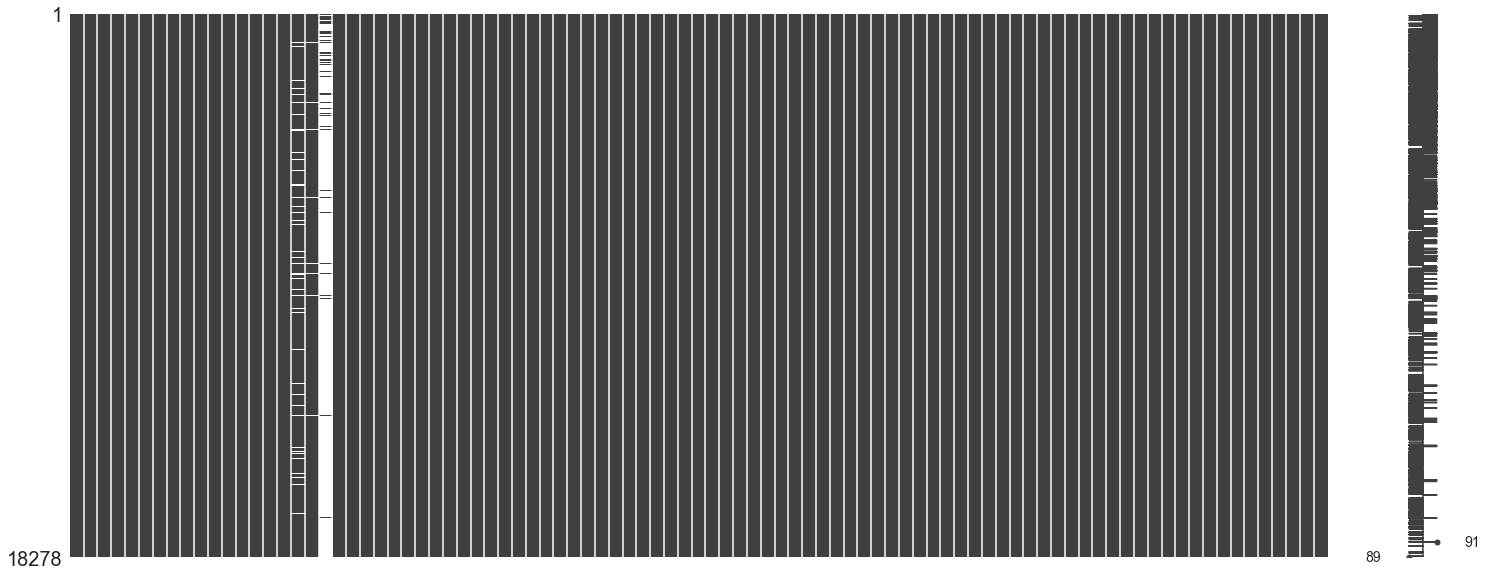

In [20]:
msno.matrix(fifa)

In [21]:
fifa.isna().sum().sort_values(ascending=False)/fifa.shape[0]*100

nation_position       93.839589
release_clause_eur     7.101433
team_position          1.313054
short_name             0.000000
goalkeeping_diving     0.000000
                        ...    
gk_positioning         0.000000
gk_speed               0.000000
gk_reflexes            0.000000
gk_kicking             0.000000
rb                     0.000000
Length: 91, dtype: float64

In [22]:
# deleting column 'nation_position'

fifa.drop('nation_position', axis=1, inplace=True)

We will replace missing values in team_position column by 'Not Given'

In [23]:
fifa['team_position']=fifa['team_position'].fillna('Not Given')

In [24]:
fifa.isna().sum().sort_values(ascending=False)/fifa.shape[0]

release_clause_eur          0.071014
short_name                  0.000000
defending_sliding_tackle    0.000000
rs                          0.000000
st                          0.000000
                              ...   
gk_positioning              0.000000
gk_speed                    0.000000
gk_reflexes                 0.000000
gk_kicking                  0.000000
rb                          0.000000
Length: 90, dtype: float64

Now only one column is remained with the missing value. We do not want to directly drop the row as we could loose data on some important players. So let us wait for the EDA part and impute the missing value

# Exploratory Data Analysis

## Univariate Analysis

### Height, Weight and Age Distribution

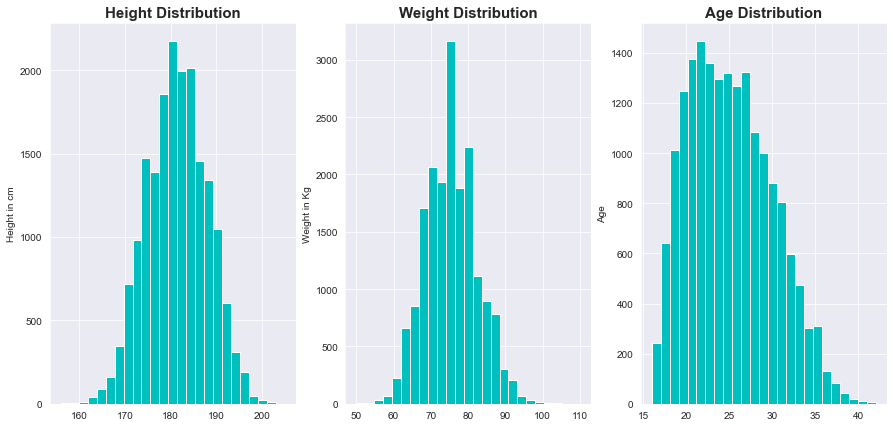

In [83]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.hist(fifa['height_cm'], bins=25, color='c')
plt.ylabel('Height in cm')
plt.title('Height Distribution'.title(), fontsize=15, fontweight="bold")

plt.subplot(1,3,2)
plt.hist(fifa['weight_kg'], bins=25, color='c')
plt.ylabel('Weight in Kg')
plt.title('Weight Distribution'.title(), fontsize=15, fontweight="bold")

plt.subplot(1,3,3)
plt.hist(fifa['age'], bins=25, color='c')
plt.ylabel('Age')
plt.title('Age Distribution'.title(), fontsize=15, fontweight="bold");

- Both attributes appear to follow normal distribution
- Heights of most of the players gathered around 175 cm to 185 cm. Highest peak is seen at 180 cm.
- Most players in the fifa dataset weighed around 70 kg to 85kg. Most number of players has weight of 75 kg.
- Age distribution appeared to be slightly right skewed. Players' age is spread a bit more on the right side than the left one. Most number of players fell into age between 18 to 30 years.

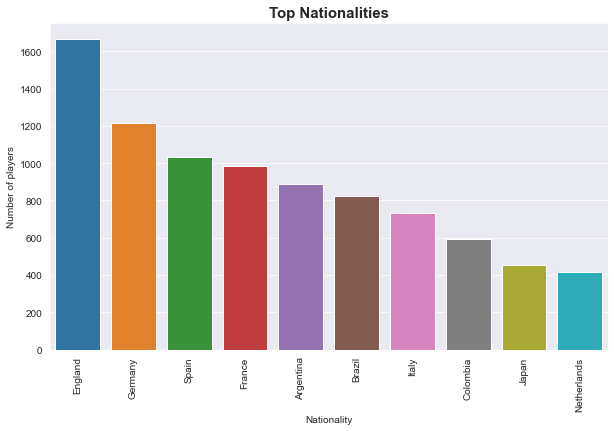

In [84]:
top_nationalities=fifa.nationality.value_counts(ascending=False)[:10]

plt.figure(figsize=(10,6))
sns.barplot(top_nationalities.keys(), top_nationalities)
plt.xlabel('Nationality')
plt.ylabel('Number of players')
plt.xticks(rotation=90)
plt.title('Top nationalities'.title(), fontsize=15, fontweight="bold");

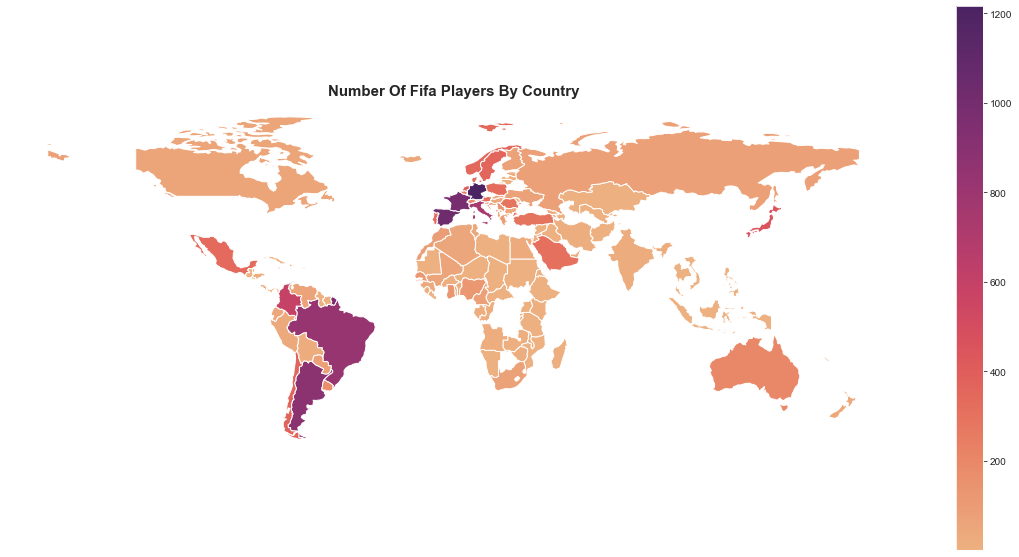

In [85]:
import geopandas as gpd

nationality_counts = fifa.groupby('nationality').size().reset_index(name='count')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged = world.merge(nationality_counts, left_on='name', right_on='nationality')

# plot the choropleth map
fig, ax = plt.subplots(figsize=(20, 10))
merged.plot(column='count', cmap='flare', ax=ax, legend=True)
ax.set_title('Number of FIFA Players by Country'.title(), fontsize=15, fontweight="bold")
ax.set_axis_off()
plt.show()


- England has the highest percentage of players in the dataset at 9.12%.
- The top 10 nationalities together account for more than 45% of the players in the dataset, indicating a concentration of players from a relatively small number of countries.
- European countries dominate the top 10, with six of them being from Europe.
- South American countries are also well represented in the top 10, with Argentina and Brazil being in the top 5.
- Japan is the only Asian country in the top 10, indicating a relatively smaller presence of players from Asia in the dataset.
- The differences in percentages between the top 10 countries are relatively small, with the highest percentage (England) being only about 6 percentage points higher than the 10th highest percentage (Netherlands). This suggests a relatively even distribution of players across the top 10 countries in the dataset.

### Value, Wage and Release Clause of Players

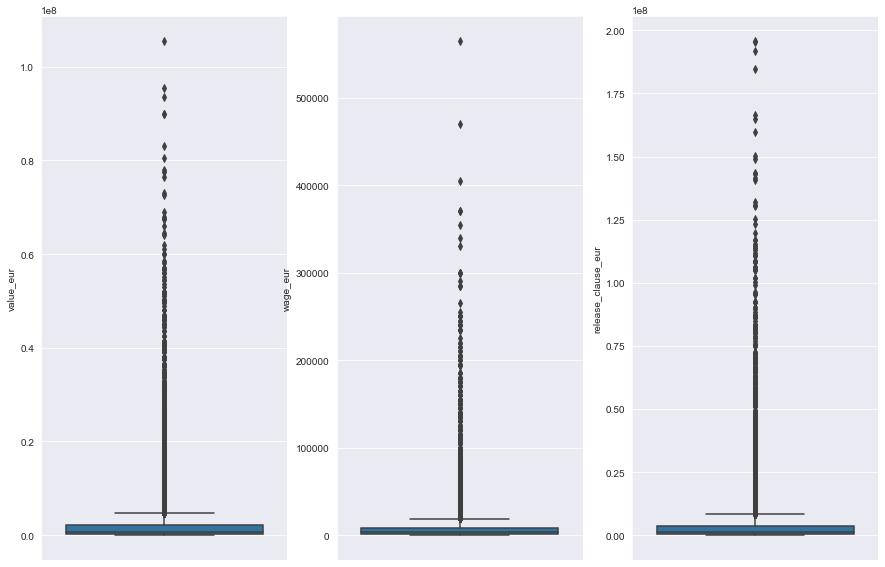

In [86]:
plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
sns.boxplot(y='value_eur',data=fifa)

plt.subplot(1,3,2)
sns.boxplot(y='wage_eur',data=fifa)

plt.subplot(1,3,3)
sns.boxplot(y='release_clause_eur',data=fifa);

- There are players who have zero market value, wage, and/or release clause.
- The distributions of all three attributes are positively skewed, with a long tail towards the higher values.
- The maximum values for all three attributes are significantly higher than their respective third quartiles, indicating the presence of outliers with extremely high values.
- The median wage is much lower than the median market value and median release clause, indicating that players receive a relatively small portion of their market value as wage.

### Preferred Foot

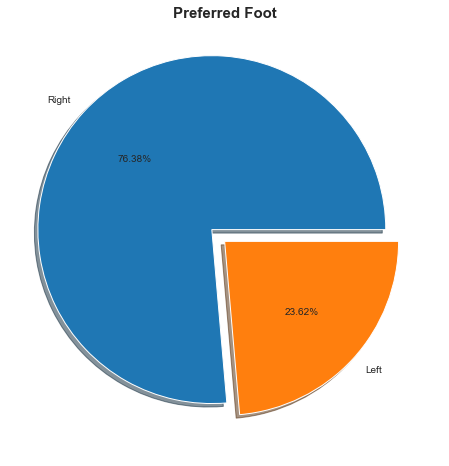

In [87]:
foot=fifa.preferred_foot.value_counts()
plt.figure(figsize=(8,8))
plt.pie(foot, labels=foot.keys(), autopct='%.2f%%', explode=[0.1,0], shadow=True)
plt.title('Preferred foot'.title(), fontsize=15, fontweight="bold");

- The majority of players in the FIFA dataset have a preferred foot of Right, with a count of 13960.
- The number of players with a preferred foot of Left is much smaller, with a count of only 4318 which is equivalent to 23.62% of the total players.
- This suggests that the majority of football players are more comfortable playing with their right foot, which could be due to a variety of factors such as being naturally right-footed or receiving more training and practice on their right side.

### Overall and Potential Attributes

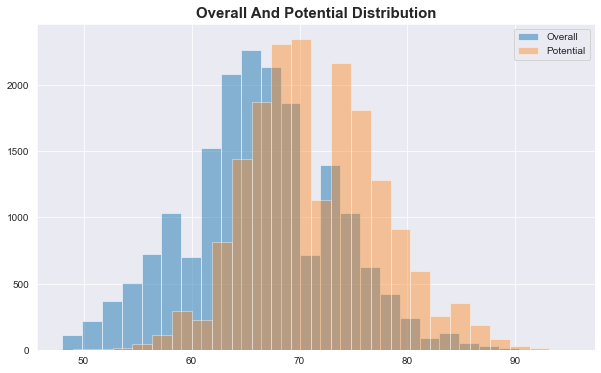

In [88]:
plt.figure(figsize=(10,6))
plt.hist(fifa['overall'], bins=25, alpha=0.5, label='Overall')
plt.hist(fifa['potential'], bins=25, alpha=0.4, label='Potential')
plt.legend()
plt.title('Overall and Potential Distribution'.title(), fontsize=15, fontweight="bold");

- Potential attribute is distributed on the right side as compared to Overall attributes. This suggests that many plates are players are yet to level thier potential.
- Overall attribute is gathered more between 60 to 70, whereas, most of the players have potential to be between 65 to 75.

## Bivariate Analysis

### Heights vs Weights

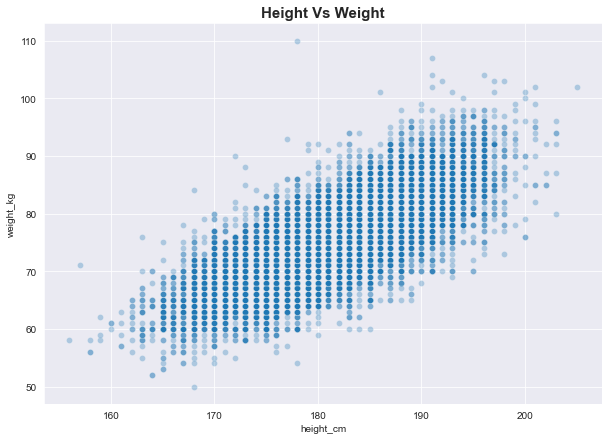

In [89]:
plt.figure(figsize=(10,7))
sns.scatterplot('height_cm', 'weight_kg', data=fifa, alpha=0.3)
plt.title('Height vs Weight'.title(), fontsize=15, fontweight="bold");

Players weights are positively correlated with their heights. In other words, players with more heights tend to have more weights.

### Age vs other attributes

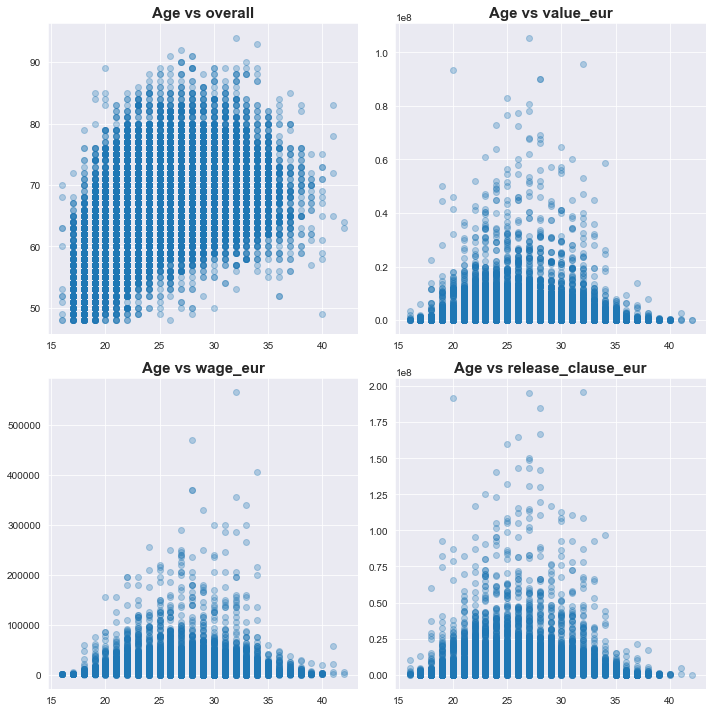

In [92]:
# columns to compare with Age

columns=['overall', 'value_eur', 'wage_eur', 'release_clause_eur']

fig, ax=plt.subplots(2,2, figsize=(10,10))

for col, ax in zip(columns, ax.flatten()):
    ax.scatter(fifa['age'], fifa[col], alpha=0.3)
    ax.set_title('Age vs {}'.format(col), fontsize=15, fontweight="bold")
plt.tight_layout()

- For Age vs Overall, the general trend is upward. It insuinitate that players who spent more years playing on the pitch gained more potential rating. However, the trend is moderate. Some players show higher overall ratings than many players despite being younger and vice-versa is true for some players as well. Surely, natural talent plays a role in players' development. Looking at Haaland and Mbappe, we need not ask for proof.
- When attribute 'age' is plotted against players values, wage and release clause, we have observed similar trend in all the plots. Value, wage and Release clause is higher for player who fall in age group between 21 years and 34 years with tails on both sides. This means that players value, wage and release clause in lower at the begining and end of the their career. 

### Release clause vs Value and Wage

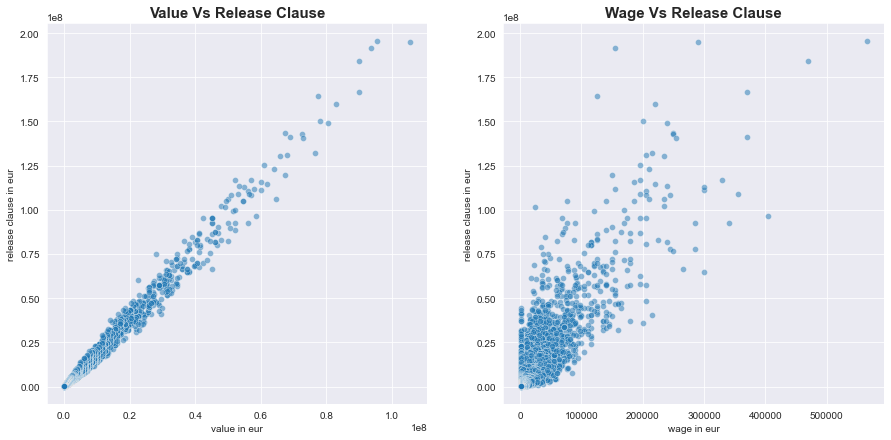

In [95]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.scatterplot('value_eur', 'release_clause_eur', data=fifa, alpha=0.5)
plt.xlabel('value in eur')
plt.ylabel('release clause in eur')
plt.title('value vs release clause'.title(), fontsize=15, fontweight="bold")

plt.subplot(1,2,2)
sns.scatterplot('wage_eur', 'release_clause_eur', data=fifa, alpha=0.5)
plt.xlabel('wage in eur')
plt.ylabel('release clause in eur')
plt.title('wage vs release clause'.title(), fontsize=15, fontweight="bold");

- Players value is strongly correlated with his release clause. Player with higher value tend to have higher release clause intcluded in his contract.
- Wage also shows postive corrleation with release clause. However, it is not as strong as the one between value and release clause.
- As we go on increase value, age or release clause, the number of players falling into higher groups decreases and scatter plot appears dispersed.

In [34]:
fifa.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,195800000.0,RW,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,96500000.0,LW,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,195200000.0,CAM,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,164700000.0,GK,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,184500000.0,LW,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


## Answering Intersting Questions

Before we find answers to some interesting questions, let us first filter out players who have overall rating more than 65. 

The idea is to select players who plays periodically if not consistently in the recognised leagues. Otherwise, we will end up having unknow players from some unknown leagues.

### Who are the eldest player/s?

In [35]:
players=fifa[fifa['overall']>=65]

In [36]:
print('fifa', fifa.shape)
print('players', players.shape)

fifa (18278, 90)
players (11020, 90)


In [37]:
players[players['age']==players.age.max()]

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
200,G. Buffon,41,192,92,Italy,Juventus,83,83,2600000,58000,GK,Right,4,2,1,Medium/Medium,4300000.0,SUB,0.0,0.0,0.0,0.0,0.0,0.0,78.0,77.0,74.0,80.0,33.0,91.0,13,15,13,37,17,26,20,13,35,28,37,30,55,80,49,56,71,34,69,13,38,28,12,50,22,70,13,11,11,78,77,74,91,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
868,Hilton,41,180,78,Brazil,Montpellier HSC,78,78,0,21000,CB,Right,2,4,3,Low/Medium,NaN,CB,36.0,51.0,67.0,66.0,80.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,60,45,79,74,51,64,54,48,73,73,35,36,54,70,60,55,79,54,76,58,76,80,50,67,64,77,83,77,76,12,7,11,12,13,58+2,58+2,58+2,58+2,59+2,59+2,59+2,58+2,62+2,62+2,62+2,60+2,68+2,68+2,68+2,60+2,67+2,74+2,74+2,74+2,67+2,68+2,76+2,76+2,76+2,68+2
3706,C. Lucchetti,41,182,69,Argentina,Atlético Tucumán,72,72,325000,5000,GK,Right,1,3,1,Medium/Medium,488000.0,GK,0.0,0.0,0.0,0.0,0.0,0.0,72.0,69.0,76.0,73.0,43.0,70.0,23,13,23,34,18,24,27,30,32,35,40,45,44,71,45,57,62,35,55,16,45,17,16,51,54,41,21,22,13,72,69,76,70,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10665,F. Kippe,41,194,97,Norway,Lillestrøm SK,65,65,0,1000,CB,Left,1,3,2,Medium/High,NaN,LCB,25.0,52.0,49.0,34.0,61.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,33,46,70,56,43,24,51,53,55,49,24,25,27,66,31,70,44,37,93,52,76,63,40,49,62,64,62,58,55,14,9,10,6,11,51+2,51+2,51+2,40+2,45+2,45+2,45+2,40+2,45+2,45+2,45+2,41+2,50+2,50+2,50+2,41+2,48+2,58+2,58+2,58+2,48+2,50+2,63+2,63+2,63+2,50+2


There are 4 players who are playing at the age of 41 years. And there is one famous name in the list, G. Buffon!

World cup winner Buffon is regarded as one of the best Goalkeepers in the world. He conceded only two goals in the World cup 2006. He got nominated 9 times for Ballon d’Or. Currently playing at 41 years of age makes Buffon one of the eldest players in Fifa 20.



### Who are the youngest players?

In [38]:
players[players['age']==players.age.min()]

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
4764,A. Hložek,16,185,80,Czech Republic,Sparta Praha,70,86,3500000,1000,"RW, ST, RM",Right,1,3,3,High/Medium,9900000.0,RM,74.0,68.0,66.0,74.0,30.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,68,67,73,65,66,74,64,61,62,75,73,74,70,68,72,70,70,71,75,68,69,26,68,68,61,69,25,24,23,11,10,9,11,10,70+2,70+2,70+2,70+2,70+2,70+2,70+2,70+2,69+2,69+2,69+2,69+2,63+2,63+2,63+2,69+2,52+2,50+2,50+2,50+2,52+2,49+2,46+2,46+2,46+2,49+2
6630,Fábio Silva,16,185,75,Portugal,FC Porto,68,85,1800000,1000,ST,Right,1,4,2,High/High,4700000.0,SUB,74.0,67.0,45.0,72.0,22.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,41,68,62,46,67,73,52,31,38,72,76,73,74,68,68,68,72,58,70,64,54,17,67,56,70,61,16,21,16,6,12,7,13,8,67+2,67+2,67+2,65+2,66+2,66+2,66+2,65+2,63+2,63+2,63+2,62+2,53+2,53+2,53+2,62+2,43+2,40+2,40+2,40+2,43+2,41+2,38+2,38+2,38+2,41+2


### Top NexGen: Wonderkids in Football

Football has always been a sport that is heavily reliant on young talent. Many young players, even teenagers, have made their mark on the biggest stage of football, whether it's in domestic leagues or international tournaments. One of the most exciting prospects in football is the NextGen wonderkids, players who are under the age of 20 and have the potential to become superstars in the future.

These NextGen wonderkids are scouted and nurtured by some of the biggest clubs in the world, and their potential is measured by their rating in the FIFA video game series. A potential rating of 90 or higher in FIFA is considered to be exceptional and indicates that the player has the ability to become a world-class player.

Some of the most famous NextGen wonderkids in football history include Lionel Messi, who made his debut for Barcelona at the age of 16, Kylian Mbappe, who won the World Cup with France at the age of 19, and Jadon Sancho, who became one of the most expensive English players of all time at the age of 20.

Filtering out NextGen wonderkids who meet the age and potential rating criteria can be a daunting task, but it can provide valuable insights into the future of football. These players have the potential to shape the sport for years to come and can be instrumental in determining the success of their respective clubs and national teams.

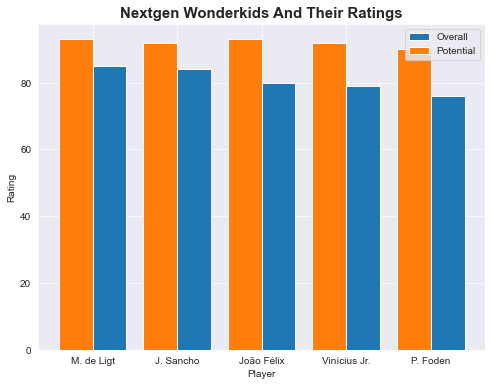

In [97]:
next_gen= players[(players['age']<20) & (players['potential']>=90)]

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(next_gen['short_name'], next_gen['overall'], width=0.4, align='edge')
ax.bar(next_gen['short_name'], next_gen['potential'], width=-0.4, align='edge')

ax.set_xlabel('Player')
ax.set_ylabel('Rating')
ax.legend(['Overall', 'Potential'])
ax.set_title('NextGen Wonderkids and their Ratings'.title(), fontsize=15, fontweight="bold");


In [96]:
next_gen

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
73,M. de Ligt,19,189,89,Netherlands,Juventus,85,93,50000000,76000,CB,Right,3,4,2,Medium/High,92500000.0,SUB,67.0,58.0,66.0,68.0,83.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,52,50,85,76,40,66,48,55,74,74,61,72,56,83,60,82,84,77,88,64,82,82,44,63,40,82,86,82,80,12,11,11,12,10,67+3,67+3,67+3,63+3,65+3,65+3,65+3,63+3,66+3,66+3,66+3,65+3,71+3,71+3,71+3,65+3,74+3,79+3,79+3,79+3,74+3,76+3,82+3,82+3,82+3,76+3
108,J. Sancho,19,180,76,England,Borussia Dortmund,84,92,44500000,61000,"RM, LM",Right,2,4,5,Medium/Low,82300000.0,RM,88.0,72.0,77.0,90.0,36.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,78,78,37,83,80,92,81,48,59,88,89,87,91,84,90,68,51,77,59,62,43,29,78,83,57,80,32,45,34,7,11,10,11,13,75+2,75+2,75+2,83+2,81+2,81+2,81+2,83+2,82+2,82+2,82+2,83+2,75+2,75+2,75+2,83+2,64+2,58+2,58+2,58+2,64+2,59+2,47+2,47+2,47+2,59+2
411,João Félix,19,181,70,Portugal,Atlético Madrid,80,93,28000000,38000,"CF, ST",Right,1,4,5,High/Medium,74900000.0,RS,82.0,80.0,74.0,81.0,40.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,73,79,69,76,79,82,81,58,67,80,79,85,83,83,80,82,79,79,64,80,69,38,84,77,68,82,30,42,35,13,12,14,13,14,79+2,79+2,79+2,79+2,80+2,80+2,80+2,79+2,79+2,79+2,79+2,78+2,73+2,73+2,73+2,78+2,62+2,59+2,59+2,59+2,62+2,59+2,53+2,53+2,53+2,59+2
568,Vinícius Jr.,18,176,73,Brazil,Real Madrid,79,92,22500000,60000,LW,Right,2,4,5,High/Medium,60200000.0,RW,93.0,70.0,71.0,85.0,29.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,71,68,50,73,70,86,77,62,67,82,92,94,93,77,83,74,75,79,60,68,48,26,76,73,65,77,32,25,18,5,7,7,7,10,73+2,73+2,73+2,79+2,77+2,77+2,77+2,79+2,77+2,77+2,77+2,78+2,70+2,70+2,70+2,78+2,58+2,53+2,53+2,53+2,58+2,53+2,43+2,43+2,43+2,53+2
1254,P. Foden,19,171,69,England,Manchester City,76,90,16500000,52000,"CAM, CM",Left,1,3,4,Medium/Medium,40800000.0,SUB,74.0,64.0,74.0,79.0,55.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,68,66,47,80,48,77,68,57,74,79,77,72,87,69,89,70,49,72,44,61,62,58,69,76,48,78,56,58,47,8,15,6,10,13,67+2,67+2,67+2,73+2,72+2,72+2,72+2,73+2,74+2,74+2,74+2,74+2,73+2,73+2,73+2,74+2,66+2,66+2,66+2,66+2,66+2,63+2,56+2,56+2,56+2,63+2


- The players listed are all under the age of 20, which highlights the focus on developing young talent in football.
- All of the players have high potential ratings, with four of them having a potential rating of 90 or above. This indicates that they have the potential to become top players in the future.
- The players represent a diverse range of nationalities, including Netherlands, England, Portugal, and Brazil.
- Juventus has the youngest player on the list, Matthijs de Ligt, who is only 19 years old but already has a high overall rating of 85.
- João Félix, who plays for Atlético Madrid, has the highest potential rating on the list at 93. He is also one of the youngest players on the list, at just 19 years old.

Despite being young and having high potential ratings, the players' current wages and values are relatively low compared to more established players in the sport. For example, the highest valued player on the list, Matthijs de Ligt, has a value of 50 million euros, which is a fraction of the value of players like Lionel Messi or Cristiano Ronaldo.

The players listed have a variety of positions, including center back, right and left midfield, center forward, striker, and attacking midfield. This indicates that young talent is being developed across all areas of the field.
Overall, these next generation wonderkids represent the future of football and are highly sought after by top clubs looking to secure their talent. It will be interesting to see how their careers develop in the coming years and if they live up to their potential.

In [39]:
# +++++++++++++++++++++++++++++++++++++++++++++++++++DO EDA HERE+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Data Preprocessing

In [40]:
train_fifa=fifa[fifa['overall']>80]

### Curating data types

If we look at the last 26 columns, they represent positional attributes of the players. But they are given in string format. We will round off these attribute to nearest integer. To perform this action, we will create a function str_to_int which will transform the string to nearest interger

In [41]:
train_fifa.iloc[:3,64:]

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3


In [42]:
def str_to_int(x):
   new= int(str(x).split('+')[0]) 

   return new

In [43]:
# columns to change the datatypes
columns= ['ls','st', 'rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

for col in columns:
    train_fifa[col]=train_fifa[col].apply(str_to_int)

train_fifa.head(3)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,195800000.0,RW,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,96500000.0,LW,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,195200000.0,CAM,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61


### Imputing Missing Values

In [44]:
from sklearn.impute import SimpleImputer, KNNImputer
from fancyimpute import KNN, IterativeImputer

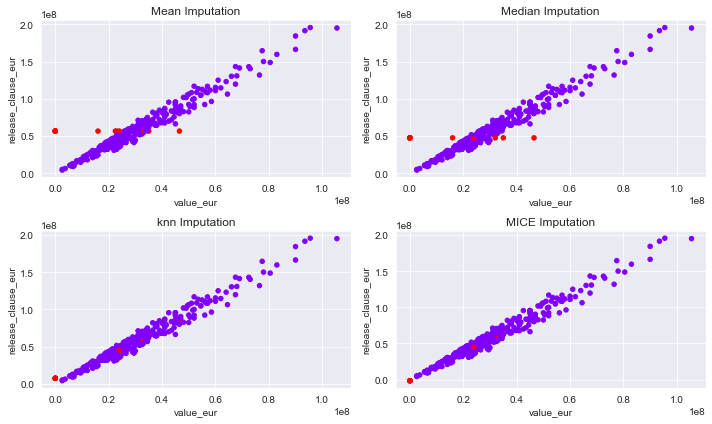

In [45]:
# filtering out numerical data
fifa_cat_list=list(train_fifa.select_dtypes('object').columns)
fifa_num=train_fifa.drop(columns=fifa_cat_list)

# mean imputation
df_mean = fifa_num.copy()
mean_imputer = SimpleImputer(strategy = "mean")
df_mean.iloc[:,:] = mean_imputer.fit_transform(df_mean)

# median imputation
df_median =fifa_num.copy()
median_imputer = SimpleImputer(strategy = "median")
df_median.iloc[:,:] = median_imputer.fit_transform(df_median)

# KNN imputation
df_knn = fifa_num.copy()
knn_imputer = KNNImputer()
df_knn.iloc[:,:]= knn_imputer.fit_transform(df_knn)

# MICE imputation
df_mice= fifa_num.copy()
mice_imputer = IterativeImputer()
df_mice.iloc[:,:]= mice_imputer.fit_transform(df_mice)

# let's analyse all above imputation results visually
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(10,6))

nullity = train_fifa["release_clause_eur"].isna()
imputations = {"Mean Imputation": df_mean,
               "Median Imputation": df_median,
               "knn Imputation": df_knn,
              "MICE Imputation": df_mice}

for ax, key in zip(ax.flatten(), imputations):
    
    imputations[key].plot(x = "value_eur", y = "release_clause_eur", kind="scatter", 
                             ax=ax, c=nullity, cmap="rainbow", title=key, colorbar=None)
    
    plt.tight_layout();

The graphs are plotted with Fare values on x-axis and Age on y-axis. Imputed values are represented by red dots. 
- Mean and Median imputation techniques fill constant values so, we see the imputed missing values along the straight horizontal line.
- As KNN and MICE Imputation techniques are distance based, values are imputed based on nearest distance to the other observations. Hence, they give results close to the original data. 

Both KNN and MICE show almost the same results. KNN imputation is typically faster and computationally less complex than MICE imputation, which involves multiple imputations and model fitting. KNN imputation involves calculating distances between observations and selecting the nearest neighbors for imputation, which is computationally less intensive.

In [46]:
fifa_num_imputed=df_knn.copy()

## Correlation

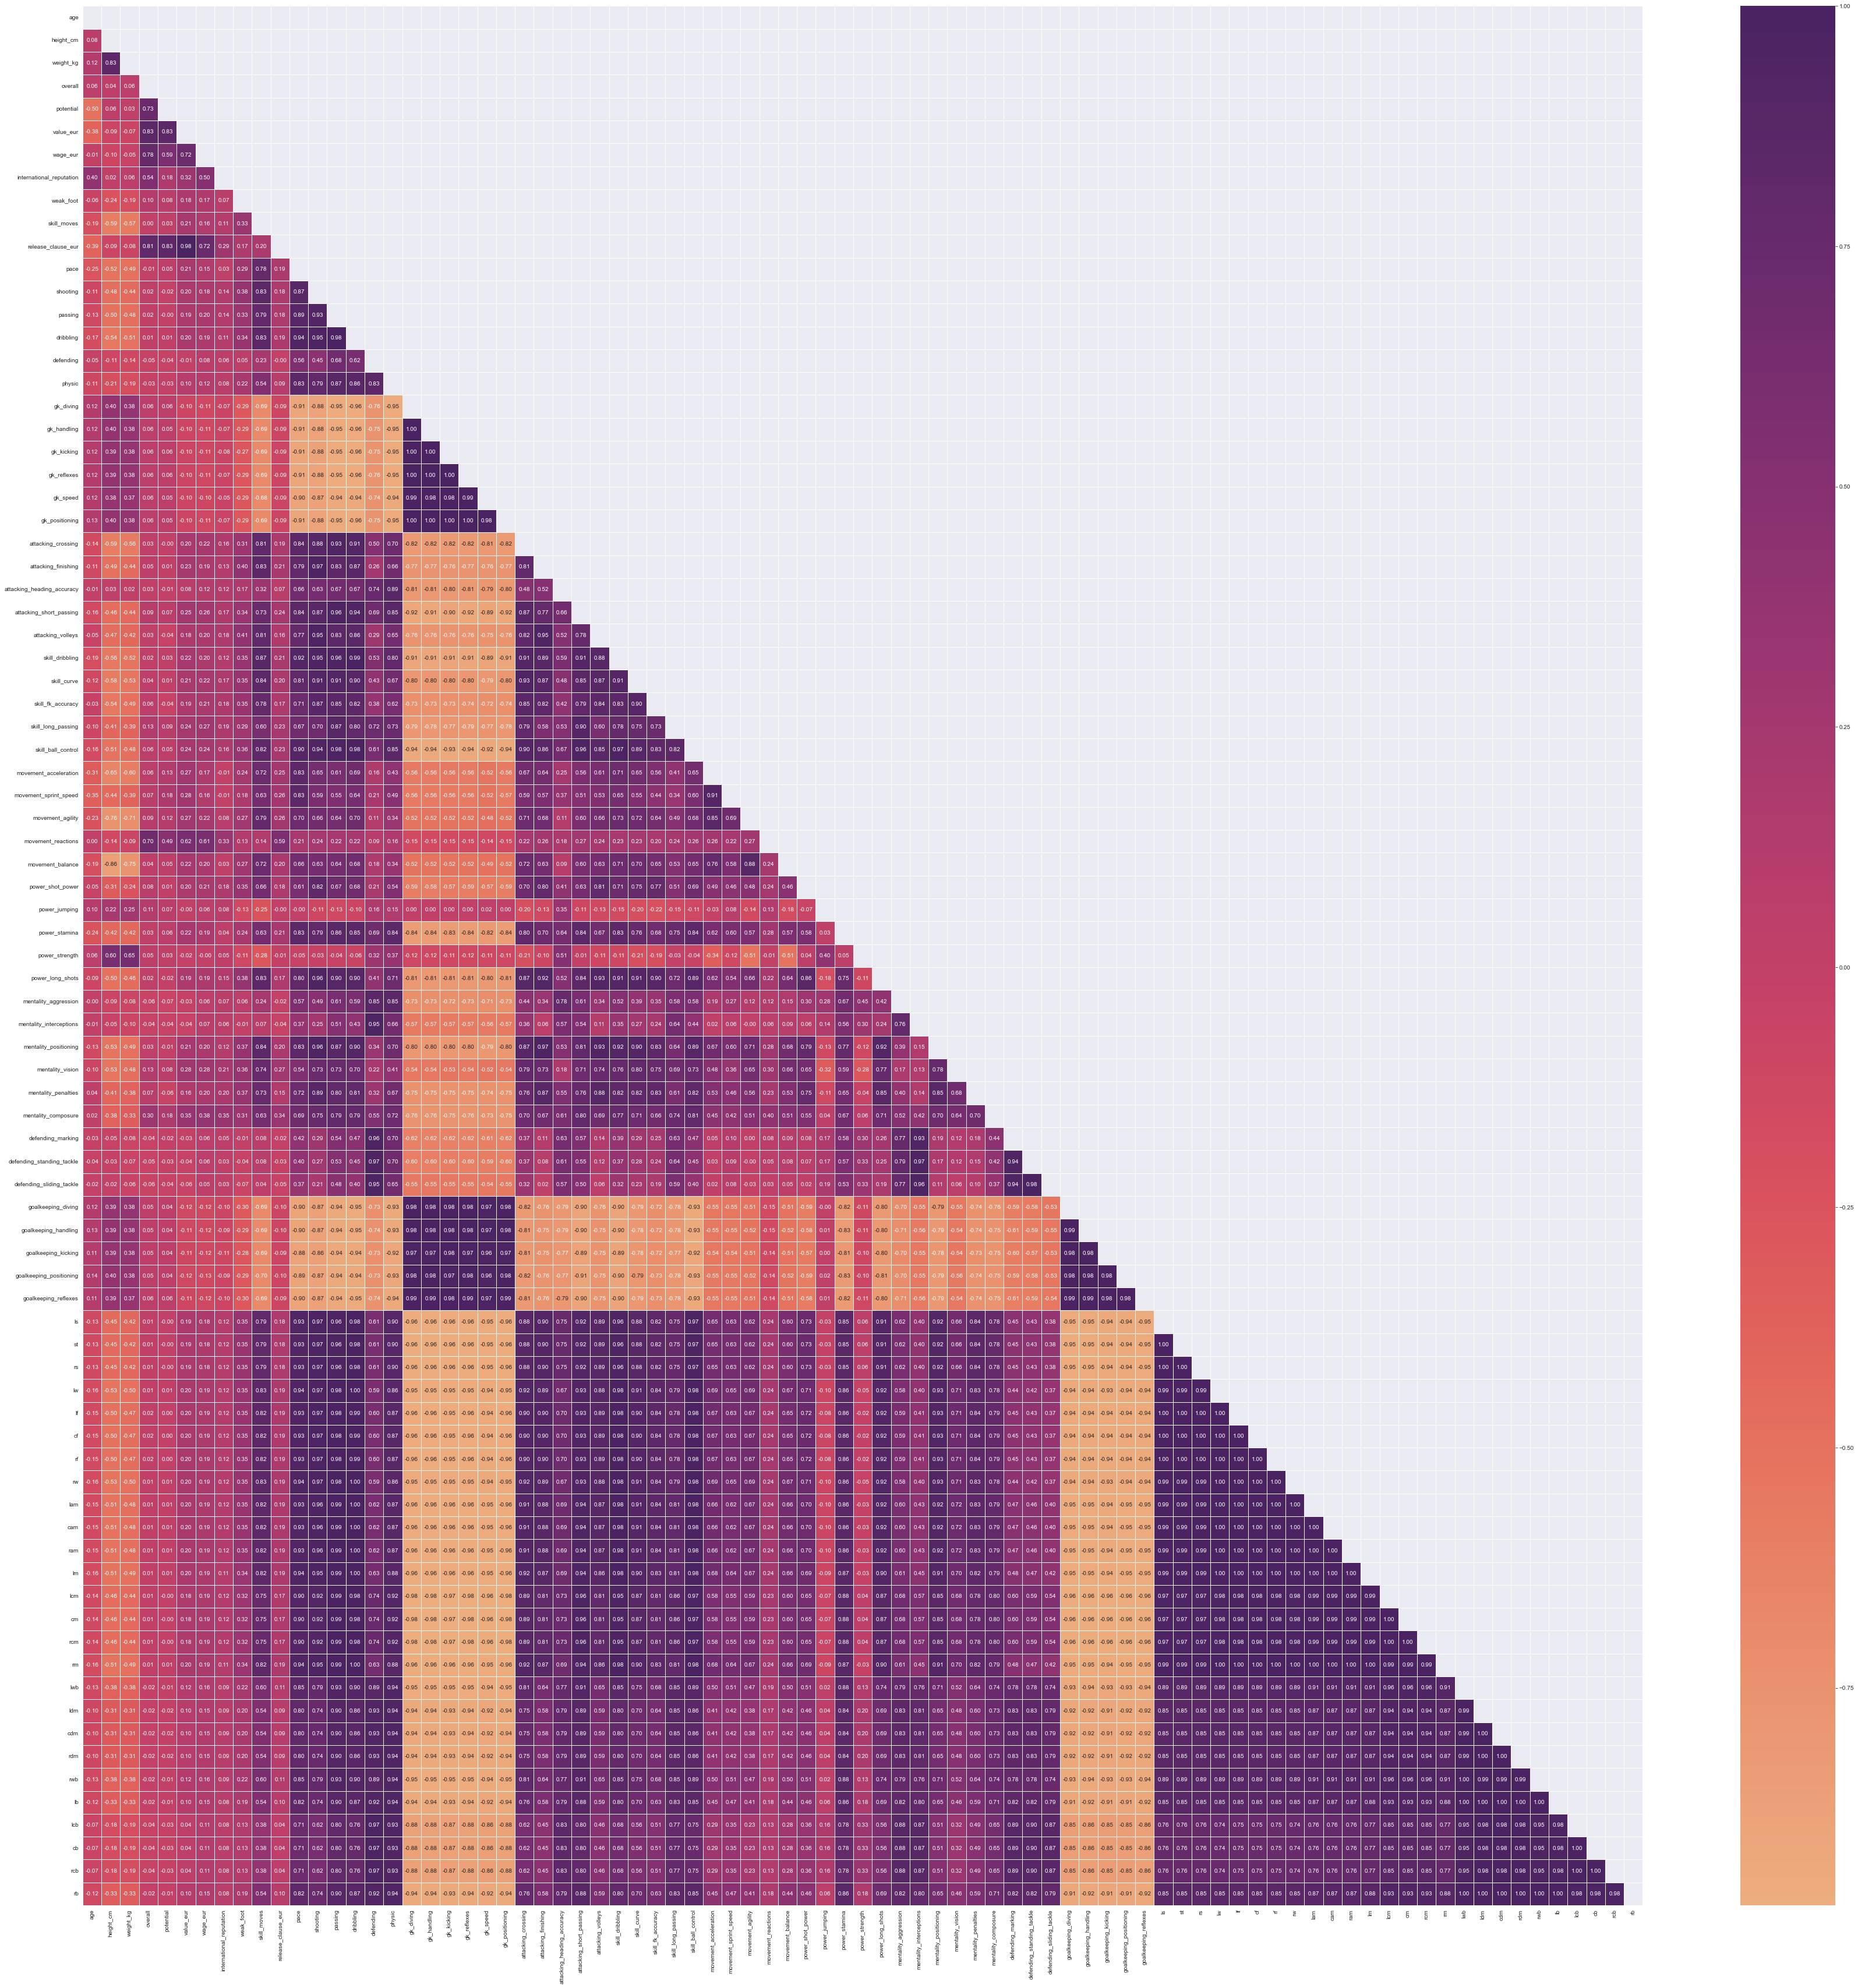

In [47]:
#correlation
corr= fifa_num_imputed.corr()
mask=np.triu(np.ones_like(corr, dtype=bool))

#heatmap
plt.figure(figsize=(60,60))
sns.heatmap(fifa_num_imputed.corr(), mask=mask, center=0, cmap='flare', linewidths=1, annot=True, fmt='.2f');

We can clearly see there are multiple attributes which are strongly correlated with each other. We will get rid of it as they are conveying same information as their related attributes. 

## Scaling

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler=StandardScaler()
fifa_scaled=scaler.fit_transform(fifa_num_imputed)

min_max=MinMaxScaler()
fifa_min_max=min_max.fit_transform(fifa_num_imputed)

## PCA

In [49]:
from sklearn.decomposition import PCA
pca=PCA()
fifa_pca=pca.fit_transform(fifa_scaled)

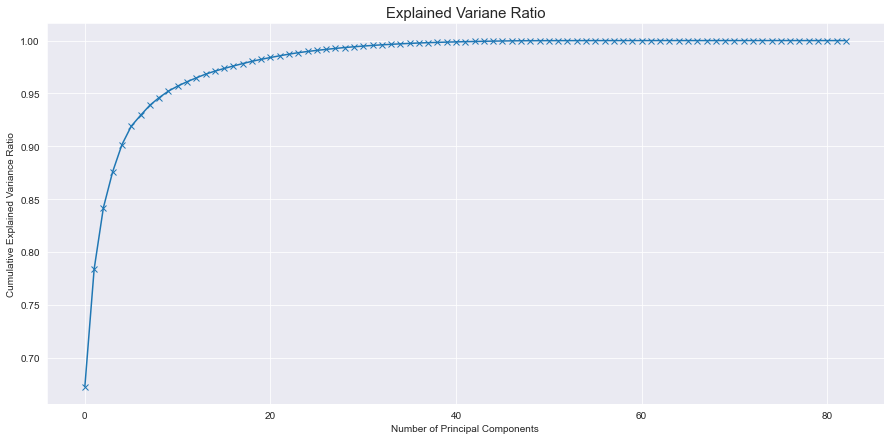

In [50]:
plt.figure(figsize=(15,7))
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='x')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variane Ratio'.title(), fontsize=15);

- The cumulative explained variance ratio increases as the number of principal components increases.
- After 20 principal components, the gain in explained variance ratio is relatively small compared to the total explained variance.
- At 50 principal components, the cumulative explained variance ratio reaches 99%, and at 70 principal components, it reaches 100%.
- To select the optimal number of principal components, we will choose the number of principal components that explains at least 95% of the variance in the data. In this case, it would be around 20 principal components.

In [51]:
pca_comp=PCA(n_components=2)
fifa_pca=pca_comp.fit_transform(fifa_scaled)
#concatenating with original dataset
col_names=['PC1', 'PC2']
new_fifa=pd.concat([fifa_num_imputed.reset_index(drop=True), pd.DataFrame(fifa_pca, columns=col_names)], axis=1)
new_fifa['player_name']=fifa['short_name']
new_fifa.head(3)

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,PC1,PC2,player_name
0,32.0,170.0,72.0,94.0,94.0,95500000.0,565000.0,5.0,4.0,4.0,195800000.0,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,95.0,70.0,92.0,88.0,97.0,93.0,94.0,92.0,96.0,91.0,84.0,93.0,95.0,95.0,86.0,68.0,75.0,68.0,94.0,48.0,40.0,94.0,94.0,75.0,96.0,33.0,37.0,26.0,6.0,11.0,15.0,14.0,8.0,89.0,89.0,89.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,92.0,87.0,87.0,87.0,92.0,68.0,66.0,66.0,66.0,68.0,63.0,52.0,52.0,52.0,63.0,-6.286130,6.857673,L. Messi
1,34.0,187.0,83.0,93.0,93.0,58500000.0,405000.0,5.0,4.0,5.0,96500000.0,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,84.0,94.0,89.0,83.0,87.0,89.0,81.0,76.0,77.0,92.0,89.0,91.0,87.0,96.0,71.0,95.0,95.0,85.0,78.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,-5.181026,4.763143,Cristiano Ronaldo
2,27.0,175.0,68.0,92.0,92.0,105500000.0,290000.0,5.0,5.0,5.0,195200000.0,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,87.0,62.0,87.0,87.0,96.0,88.0,87.0,81.0,95.0,94.0,89.0,96.0,92.0,84.0,80.0,61.0,81.0,49.0,84.0,51.0,36.0,87.0,90.0,90.0,94.0,27.0,26.0,29.0,9.0,9.0,15.0,15.0,11.0,84.0,84.0,84.0,90.0,89.0,89.0,89.0,90.0,90.0,90.0,90.0,89.0,82.0,82.0,82.0,89.0,66.0,61.0,61.0,61.0,66.0,61.0,46.0,46.0,46.0,61.0,-5.337898,7.370628,Neymar Jr


# Clustering Model Development

In [52]:
from sklearn.cluster import KMeans

In [53]:
wcss=[]

for k in range(1,15):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(fifa_pca)
    inertia=kmeans.inertia_
    wcss.append(inertia)

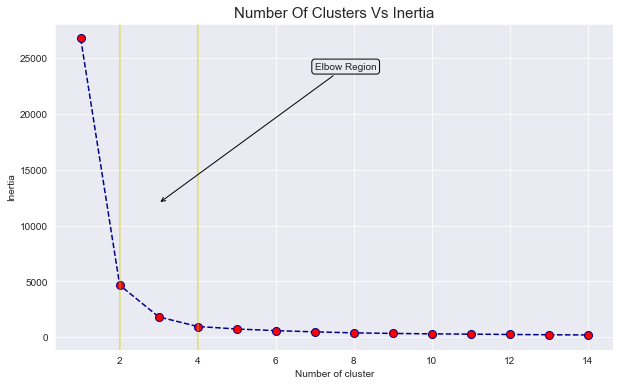

In [54]:
#plotting graph
plt.figure(figsize=(10,6))
plt.plot(range(1,15), wcss, color='darkblue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=8)
plt.axvline(2, alpha=0.5, color='y')
plt.axvline(4, alpha=0.5, color='y')
plt.annotate('Elbow Region', (3, 12000), (7, 24000),
            arrowprops=dict(arrowstyle="->",connectionstyle="Arc3", color="k"),
            bbox = dict(boxstyle = "round", fc ="none", ec="k"))
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.title('Number of clusters vs Inertia'.title(), fontsize=15);

We have got a visual where Elbow can be. The bend occurs at clusters 2. But the wcss becomes more stable after clusters 4. Although, this plot gives us better understanding of what number of clusters are suitble for the dataset, we will still try out model with 2, 3 and 4 clusters respectively. To avoid repeating the code, we will create a function which takes number of clusters as argument and returns us the clustered plot. It is as follows:

In [61]:
def plot_clusters(num_clusters):
    kmeans=KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    kmeans.fit(fifa_pca)
    #Adding labels to new_fifa dataframe
    new_fifa['labels']=kmeans.labels_

    sub_data=new_fifa[new_fifa['overall']>80]
    plt.figure(figsize=(20,15))
    sns.scatterplot('PC1', 'PC2', hue='labels', palette='tab10', data=sub_data)

    for index, row in new_fifa.iterrows():
        if row['overall']>85:
            plt.annotate(row['player_name'], xy=(row['PC1'], row['PC2']), xytext=(row['PC1']+1, row['PC2']+1), textcoords='offset points',
                ha='left', va='top', fontsize=12, bbox=dict(facecolor='white', edgecolor='gray', alpha=0.7), 
                arrowprops=None)

In [56]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [57]:
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.8205592508416951
For n_clusters = 3 The average silhouette_score is : 0.5741531227815673
For n_clusters = 4 The average silhouette_score is : 0.5657888705441513
For n_clusters = 5 The average silhouette_score is : 0.5182819499046362
For n_clusters = 6 The average silhouette_score is : 0.4701672026353291


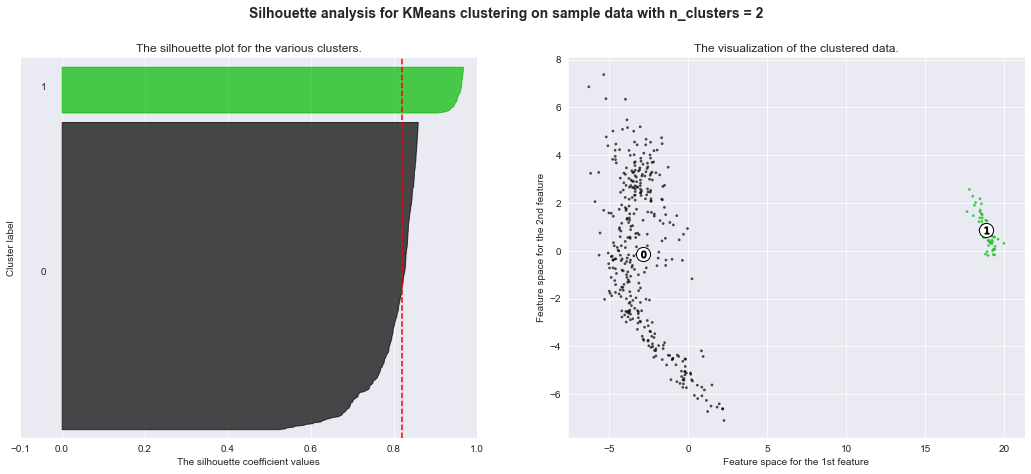

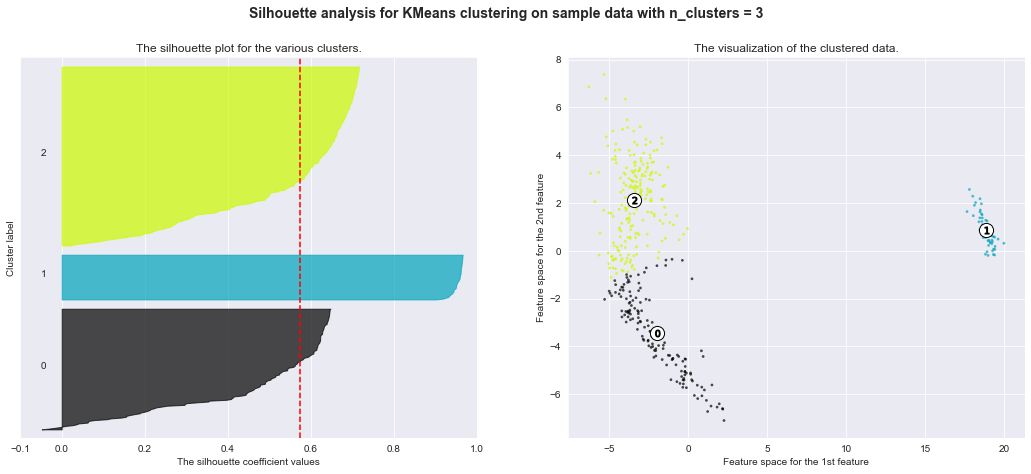

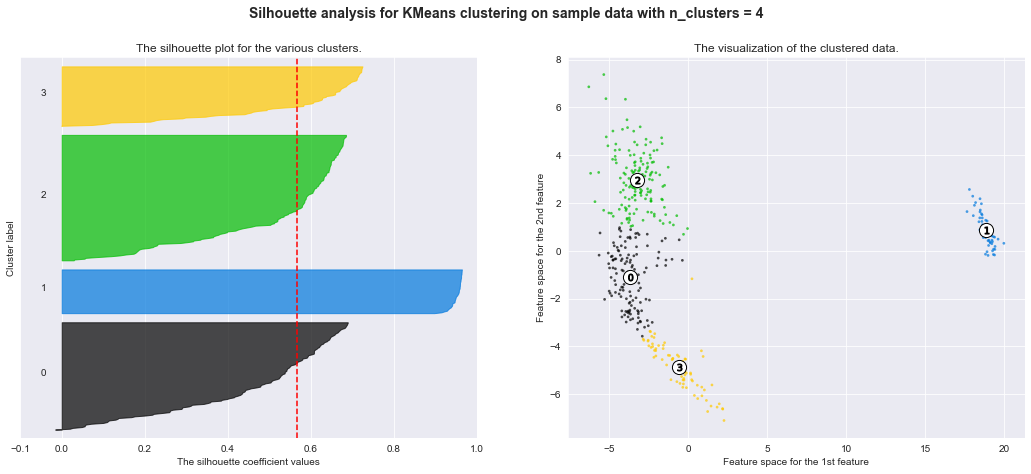

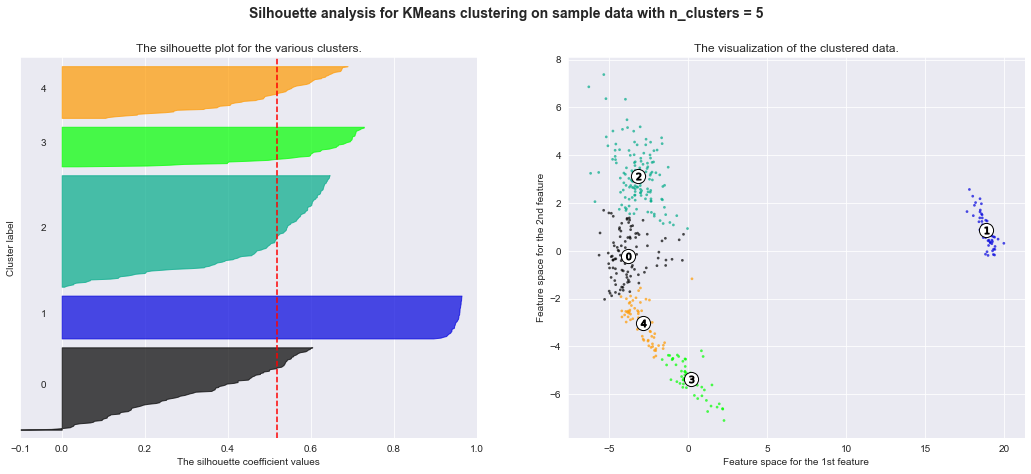

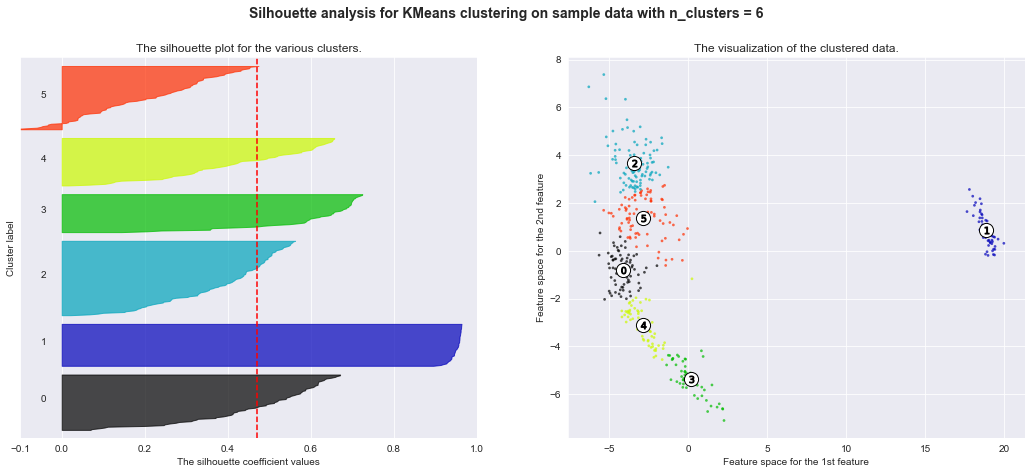

In [58]:
'''the code is inspired and edited from sklearn official page.
link: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#:~:text=The%20silhouette%20plot%20displays%20a,like%20number%20of%20clusters%20visually.
'''

range_n_clusters = [2, 3, 4, 5,6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(fifa_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(fifa_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(fifa_pca, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(fifa_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
    new_fifa['PC1'], new_fifa['PC2'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

From the silhouette scores obtained for different values of n_clusters, we can observe that the clustering with 2 clusters has the highest silhouette score of 0.686, indicating that the data points are well matched to their own clusters and poorly matched to neighboring clusters. On the other hand, the clustering with 3 or more clusters has lower silhouette scores, indicating that the data points are overlapping or are not well-matched to their own clusters.

It is important to note that the silhouette score alone may not provide a complete picture of the quality of the clustering. In some cases, a lower silhouette score may still correspond to good clustering, especially when the clusters are well-separated and clearly distinct from each other.

In the current case, the silhouette score for 4 clusters is relatively low at 0.266, but the clustering appears to be good from the visualization of the data points. This could be due to the fact that some of the clusters have a smaller number of data points, leading to lower silhouette scores. Additionally, the data points within a cluster may be more densely packed, resulting in a lower silhouette score, but still indicating good clustering

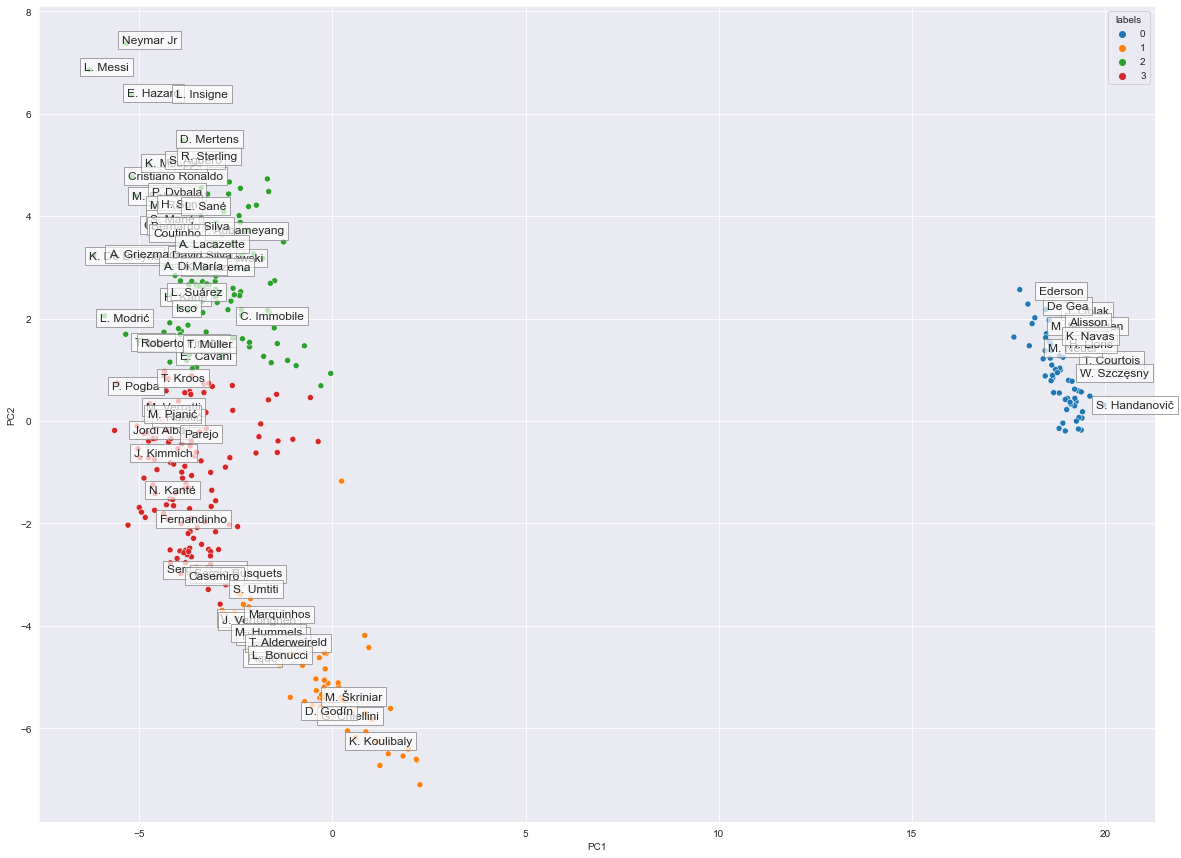

In [63]:
plot_clusters(4)

The model appears to be working well with 4 clusters. The clusters are distinguished with the help of colors. Upon analysing, we can observe following points:

- Green cluster represents strikers
- Red cluster represents Midfielders
- Orange cluster represents Defenders
- Blue cluster represents Goalkeepers